## Load MNIST DATA


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv("train.csv")
print(d0.head()) # print first 5 rows of d0

# save the labels intoa variable l
l = d0['label']

# drop the label feature and store the pixel data in d

d = d0.drop("label", axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


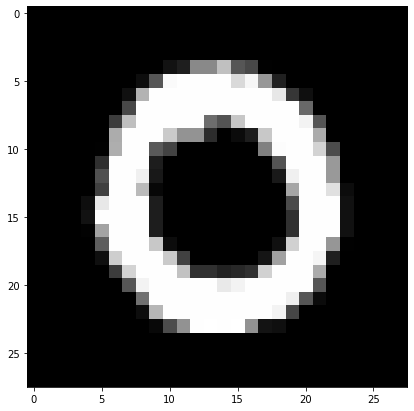

0


In [4]:
# display or plot a number
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

# 2D Visualization using PCA

In [5]:
#pick first 15k data-points to work on for time-effeciency

labels = l.head(15000)
data = d.head(15000)
print("The shape of sample data = ",data.shape)

The shape of sample data =  (15000, 784)


### Data-Preprocessing: standardizing the data

In [7]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


### find the co-variance matrix which is : A^T * T

In [9]:
sample_data = standardized_data

#matrix multiplication using numpy

covar_matrix = np.matmul(sample_data.T,sample_data)
print("The shape of variance matrix = ",covar_matrix.shape)

The shape of variance matrix =  (784, 784)


#### finding the top two eigen-values and corresponding eigen-vectors for projecting onto a 2-dim space

In [12]:

from scipy.linalg import eigh
# the parameter 'eigvals' is defined (low value to heigh value)
#eign function will return the eigen values in ascending order
#this code generates only the top 2 (782 and 783) eigenvalues

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)

# converting the eigen vectors into(2,d) shape for easyness of further com
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)


Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


#### Projecting the original data sample on the plane


In [30]:
# formed by two principal eigen vectors by vector-vectors multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("Resultant new data points shape ",vectors.shape, "X", sample_data.shape,"=",new_coordinates.shape)

Resultant new data points shape  (2, 784) X (15000, 784) = (2, 15000)


In [31]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

# creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data=new_coordinates, columns =("1st_principal","2nd_principal","labels"))

print(dataframe.head())

   1st_principal  2nd_principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


### Plotting the 2d data points with seaborn

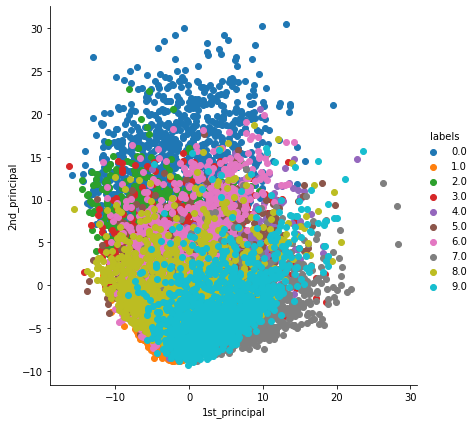

In [34]:
import seaborn as sn

sn.FacetGrid(dataframe,hue="labels",size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

## PCA using Scikit-Learn

In [38]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [59]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",pca_data.shape)



shape of pca_reduced.shape =  (15000, 2)


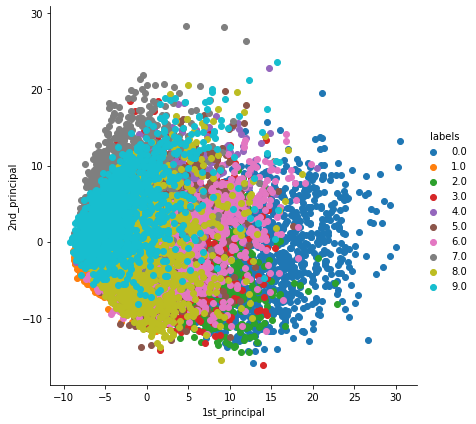

In [60]:
# attaching the label for each 2-d data points
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","labels"))
sn.FacetGrid(pca_df,hue="labels",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()